In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
#import and assign dataset
dataset = pd.read_csv('new_appData10.csv')
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,02:00:00,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19:00:00,23,NaN,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16:00:00,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18:00:00,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13:00:00,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,00:00:00,35,"Home,",4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12:00:00,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,...,0,0,0,0,0,13,0,0,0,0


In [4]:
#data preprocessing
response = dataset["enrolled"]

In [5]:
dataset = dataset.drop(columns = "enrolled")
dataset = dataset.drop(columns = "hour")
dataset = dataset.drop(columns = "screen_list")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state = 0)

In [8]:
train_ID = X_train['user']
test_ID = X_test['user']

In [9]:
X_train = X_train.drop(columns = 'user')
X_test = X_test.drop(columns = 'user')

In [10]:
#feature scaleing

In [11]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
scaled_features = StandardScaler()

In [12]:
ft = FunctionTransformer(validate=False)

In [13]:
X_train2 = pd.DataFrame(scaled_features.fit_transform(X_train))
X_test2 = pd.DataFrame(scaled_features.fit_transform(X_test))

In [14]:
#X_train2 = ft.fit_transform(X_train)
#X_test2 = ft.fit_transform(X_test)

In [15]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_train.columns.values

In [16]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [17]:
X_train = X_train2
X_test = X_test2

In [18]:
# Model building

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')

In [21]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_predict = classifier.predict(X_test)

In [23]:
y_predict

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [25]:
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

In [26]:
cm

array([[3880, 1192],
       [1125, 3803]], dtype=int64)

In [27]:
accuracy

0.7683

In [28]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

In [29]:
precision

0.7613613613613613

In [30]:
recall

0.7717126623376623

In [31]:
f1 = f1_score(y_test, y_predict)

In [32]:
f1

0.7665020659074876

Test Accuracy Score %76.83


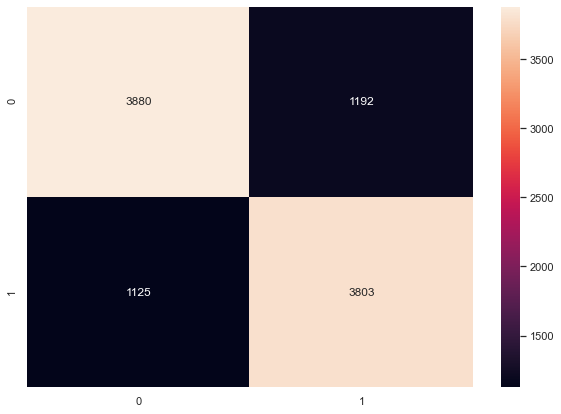

In [33]:
#visualising the confusion matrix
cm_df = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1)
sns.heatmap(cm_df, annot=True, fmt='g')
print("Test Accuracy Score %{:.4}".format((accuracy_score(y_test, y_predict)*100)))

In [34]:
#check for overfitting

In [35]:
from sklearn.model_selection import cross_val_score


In [36]:
estimator = classifier
x = X_train
y=y_train
accuracies = cross_val_score(estimator, x, y, cv = 10)

In [38]:
#formatting final results
final_results = pd.concat([y_test, test_ID], axis=1).dropna()

In [39]:
final_results['predicted_results'] = y_predict

In [40]:
final_results[["user", 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [41]:
print("Logistic Accuracies: %{:.3} +/- %{:.3}".format(accuracies.mean() * 100, accuracies.std()*2 * 100))

Logistic Accuracies: %76.7 +/- %0.982
